In [23]:
import pandas as pd
import numpy as np

In [24]:
airp = pd.read_csv("air_pol.csv")
airp

,Unique_ID,Indicator_ID,Name,Measure,Measure_Info,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Time_Period,Start_Date,Data_Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,6/1/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,6/1/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,6/1/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,6/1/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/1/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,6/1/2020,28.70,NaN
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,6/1/2020,29.56,NaN
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,6/1/2020,29.65,NaN
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,6/1/2020,29.28,NaN


In [25]:
airp.columns

Index(['Unique_ID', 'Indicator_ID', 'Name', 'Measure', 'Measure_Info',
       'Geo_Type_Name', 'Geo_Join_ID', 'Geo_Place_Name', 'Time_Period',
       'Start_Date', 'Data_Value', 'Message'],
      dtype='object')

In [26]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique_ID       16122 non-null  int64  
 1   Indicator_ID    16122 non-null  int64  
 2   Name            16121 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure_Info    16122 non-null  object 
 5   Geo_Type_Name   16121 non-null  object 
 6   Geo_Join_ID     16122 non-null  int64  
 7   Geo_Place_Name  16122 non-null  object 
 8   Time_Period     16121 non-null  object 
 9   Start_Date      16121 non-null  object 
 10  Data_Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [27]:
airp = airp.drop(columns = ["Unique_ID", "Measure_Info", "Message"])
airp.columns

Index(['Indicator_ID', 'Name', 'Measure', 'Geo_Type_Name', 'Geo_Join_ID',
       'Geo_Place_Name', 'Time_Period', 'Start_Date', 'Data_Value'],
      dtype='object')

In [28]:
airp = airp.dropna()
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 0 to 16121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator_ID    16118 non-null  int64  
 1   Name            16118 non-null  object 
 2   Measure         16118 non-null  object 
 3   Geo_Type_Name   16118 non-null  object 
 4   Geo_Join_ID     16118 non-null  int64  
 5   Geo_Place_Name  16118 non-null  object 
 6   Time_Period     16118 non-null  object 
 7   Start_Date      16118 non-null  object 
 8   Data_Value      16118 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


In [29]:
time_period = airp["Time_Period"]
time_period

0           Summer 2013
1           Summer 2014
2           Summer 2013
3           Summer 2014
4        Winter 2008-09
              ...      
16117       Summer 2020
16118       Summer 2020
16119       Summer 2020
16120       Summer 2020
16121       Summer 2020
Name: Time_Period, Length: 16118, dtype: object

In [30]:
import re
year_regex = re.compile(r'\d{4}')

def extract_year(row):
    match = year_regex.search(row['Time_Period'])
    if match:
        return match.group()
    else:
        return None

airp['year'] = airp.apply(extract_year, axis=1)

airp = airp.dropna()
airp

,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Time_Period,Start_Date,Data_Value,year
0,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),Summer 2013,6/1/2013,34.64,2013
1,386,Ozone (O3),Mean,CD,313,Coney Island (CD13),Summer 2014,6/1/2014,33.22,2014
2,386,Ozone (O3),Mean,Borough,1,Bronx,Summer 2013,6/1/2013,31.25,2013
3,386,Ozone (O3),Mean,Borough,1,Bronx,Summer 2014,6/1/2014,31.15,2014
4,383,Sulfur Dioxide (SO2),Mean,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/1/2008,5.89,2008
...,...,...,...,...,...,...,...,...,...,...
16117,386,Ozone (O3),Mean,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,6/1/2020,28.70,2020
16118,386,Ozone (O3),Mean,CD,305,East New York and Starrett City (CD5),Summer 2020,6/1/2020,29.56,2020
16119,386,Ozone (O3),Mean,CD,304,Bushwick (CD4),Summer 2020,6/1/2020,29.65,2020
16120,386,Ozone (O3),Mean,CD,303,Bedford Stuyvesant (CD3),Summer 2020,6/1/2020,29.28,2020


In [31]:
remove = re.compile(r'(Summer|Fall|Winter|Spring)\s\d{4}')

airp = airp[~airp['Time_Period'].str.contains(remove)]
    
airp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6532 entries, 22 to 15980
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator_ID    6532 non-null   int64  
 1   Name            6532 non-null   object 
 2   Measure         6532 non-null   object 
 3   Geo_Type_Name   6532 non-null   object 
 4   Geo_Join_ID     6532 non-null   int64  
 5   Geo_Place_Name  6532 non-null   object 
 6   Time_Period     6532 non-null   object 
 7   Start_Date      6532 non-null   object 
 8   Data_Value      6532 non-null   float64
 9   year            6532 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 561.3+ KB


C:\Users\aakku\AppData\Local\Temp\ipykernel_6572\3969274741.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airp = airp[~airp['Time_Period'].str.contains(remove)]


In [32]:
airp

,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Time_Period,Start_Date,Data_Value,year
22,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,101,Kingsbridge - Riverdale,2005-2007,1/1/2005,117.70,2005
23,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,102,Northeast Bronx,2005-2007,1/1/2005,77.30,2005
24,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,103,Fordham - Bronx Pk,2005-2007,1/1/2005,67.30,2005
25,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,104,Pelham - Throgs Neck,2005-2007,1/1/2005,73.60,2005
26,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,105,Crotona -Tremont,2005-2007,1/1/2005,65.80,2005
...,...,...,...,...,...,...,...,...,...,...
15968,365,Fine Particulate Matter (PM2.5),Mean,CD,413,Queens Village (CD13),Annual Average 2020,1/1/2020,5.78,2020
15971,365,Fine Particulate Matter (PM2.5),Mean,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2020,1/1/2020,5.33,2020
15974,365,Fine Particulate Matter (PM2.5),Mean,CD,501,St. George and Stapleton (CD1),Annual Average 2020,1/1/2020,5.84,2020
15977,365,Fine Particulate Matter (PM2.5),Mean,CD,502,South Beach and Willowbrook (CD2),Annual Average 2020,1/1/2020,5.58,2020


In [33]:
year_regex = re.compile(r'\d{4}')

# Функция для получения года из строки time_period
def extract_year(row):
    match = year_regex.search(row['Time_Period'])
    if match:
        return match.group()
    else:
        return None

# Создаем новый столбец 'year' и применяем к нему функцию extract_year
airp['year'] = airp.apply(extract_year, axis=1)

# Отбрасываем строки, для которых не удалось извлечь год
airp = airp.dropna()


# Выводим результат
airp

C:\Users\aakku\AppData\Local\Temp\ipykernel_6572\3493095654.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airp['year'] = airp.apply(extract_year, axis=1)


,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Time_Period,Start_Date,Data_Value,year
22,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,101,Kingsbridge - Riverdale,2005-2007,1/1/2005,117.70,2005
23,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,102,Northeast Bronx,2005-2007,1/1/2005,77.30,2005
24,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,103,Fordham - Bronx Pk,2005-2007,1/1/2005,67.30,2005
25,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,104,Pelham - Throgs Neck,2005-2007,1/1/2005,73.60,2005
26,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,105,Crotona -Tremont,2005-2007,1/1/2005,65.80,2005
...,...,...,...,...,...,...,...,...,...,...
15968,365,Fine Particulate Matter (PM2.5),Mean,CD,413,Queens Village (CD13),Annual Average 2020,1/1/2020,5.78,2020
15971,365,Fine Particulate Matter (PM2.5),Mean,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2020,1/1/2020,5.33,2020
15974,365,Fine Particulate Matter (PM2.5),Mean,CD,501,St. George and Stapleton (CD1),Annual Average 2020,1/1/2020,5.84,2020
15977,365,Fine Particulate Matter (PM2.5),Mean,CD,502,South Beach and Willowbrook (CD2),Annual Average 2020,1/1/2020,5.58,2020


In [34]:
airp = airp.drop(columns = "Time_Period")
airp

,Indicator_ID,Name,Measure,Geo_Type_Name,Geo_Join_ID,Geo_Place_Name,Start_Date,Data_Value,year
22,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,101,Kingsbridge - Riverdale,1/1/2005,117.70,2005
23,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,102,Northeast Bronx,1/1/2005,77.30,2005
24,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,103,Fordham - Bronx Pk,1/1/2005,67.30,2005
25,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,104,Pelham - Throgs Neck,1/1/2005,73.60,2005
26,639,PM2.5-Attributable Deaths,Estimated Annual Rate - Adults 30 Yrs and Older,UHF42,105,Crotona -Tremont,1/1/2005,65.80,2005
...,...,...,...,...,...,...,...,...,...
15968,365,Fine Particulate Matter (PM2.5),Mean,CD,413,Queens Village (CD13),1/1/2020,5.78,2020
15971,365,Fine Particulate Matter (PM2.5),Mean,CD,414,Rockaway and Broad Channel (CD14),1/1/2020,5.33,2020
15974,365,Fine Particulate Matter (PM2.5),Mean,CD,501,St. George and Stapleton (CD1),1/1/2020,5.84,2020
15977,365,Fine Particulate Matter (PM2.5),Mean,CD,502,South Beach and Willowbrook (CD2),1/1/2020,5.58,2020


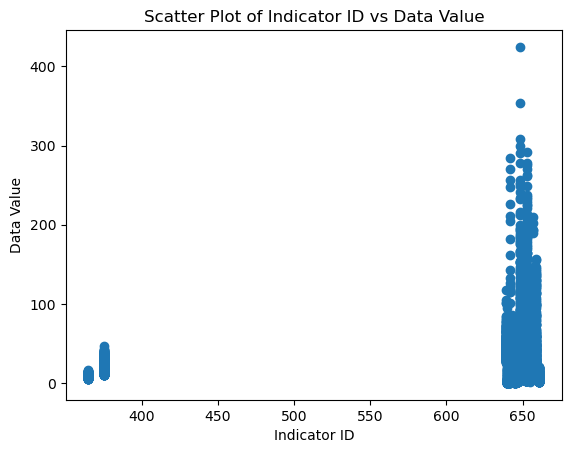

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(airp['Indicator_ID'], airp['Data_Value'])
ax.set_xlabel('Indicator ID')
ax.set_ylabel('Data Value')
ax.set_title('Scatter Plot of Indicator ID vs Data Value')
plt.show()

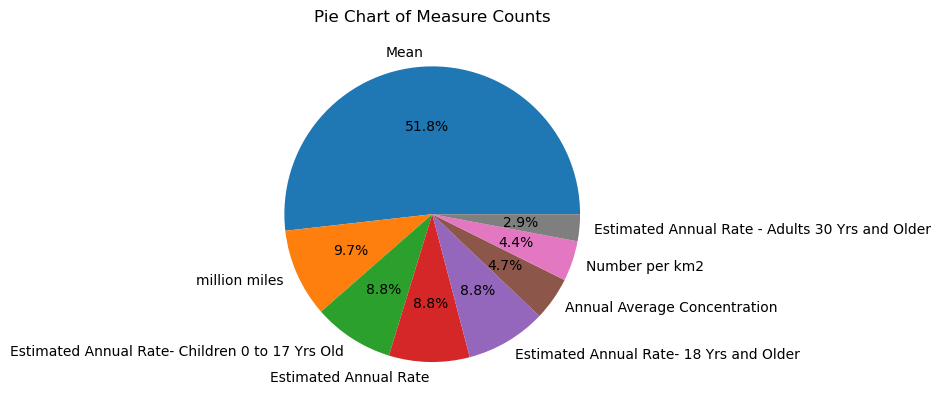

In [40]:
measure_counts = airp['Measure'].value_counts()
labels = measure_counts.index
sizes = measure_counts.values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Pie Chart of Measure Counts')
plt.show()

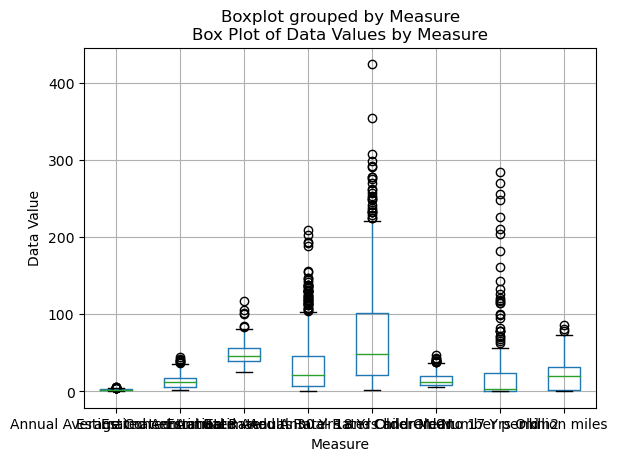

In [44]:
airp.boxplot(column='Data_Value', by='Measure')
plt.xlabel('Measure')
plt.ylabel('Data Value')
plt.title('Box Plot of Data Values by Measure')
plt.show()

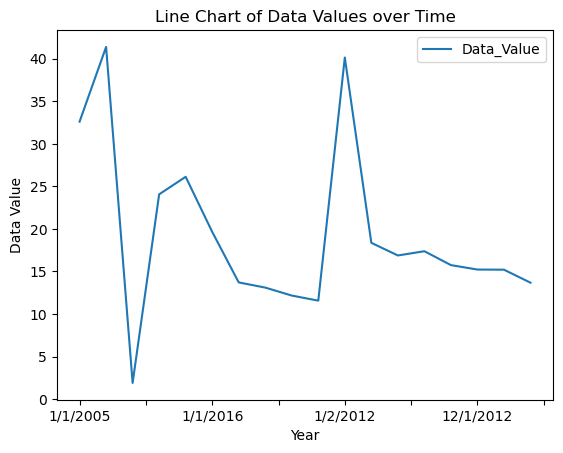

In [46]:
year_data = airp.groupby('Start_Date').mean()

# Create line chart
year_data.plot(kind='line', y='Data_Value')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.title('Line Chart of Data Values over Time')
plt.show()

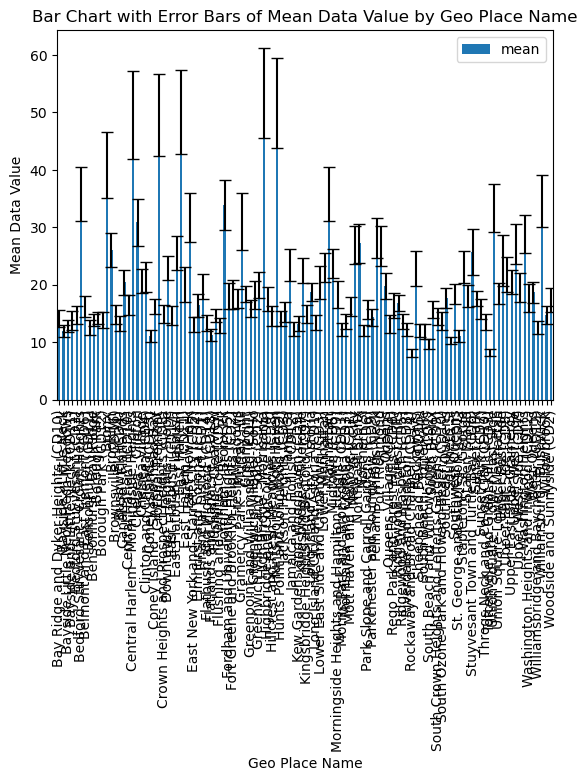

In [50]:
place_data = airp.groupby('Geo_Place_Name').agg({'Data_Value': ['mean', 'sem']})


place_data.plot(kind='bar', y='Data_Value', yerr='sem', capsize=4)
plt.xlabel('Geo Place Name')
plt.ylabel('Mean Data Value')
plt.title('Bar Chart with Error Bars of Mean Data Value by Geo Place Name')
plt.show()

In [52]:
import seaborn as sns
pivot_data = airp.pivot_table(values='Data_Value', index='Geo_Place_Name', columns='Measure', aggfunc='mean')

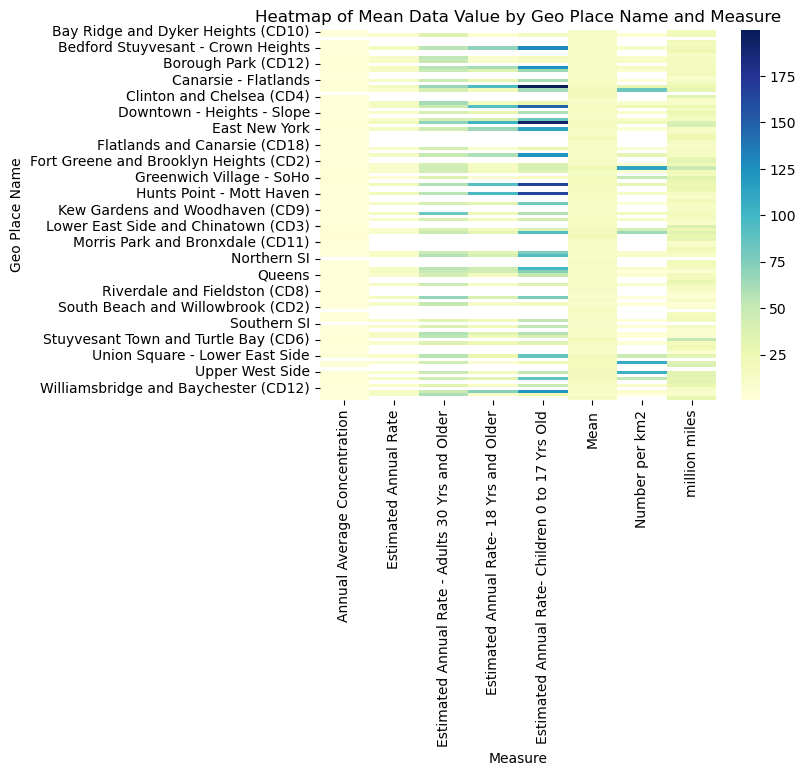

In [53]:
sns.heatmap(pivot_data, cmap='YlGnBu')
plt.xlabel('Measure')
plt.ylabel('Geo Place Name')
plt.title('Heatmap of Mean Data Value by Geo Place Name and Measure')
plt.show()

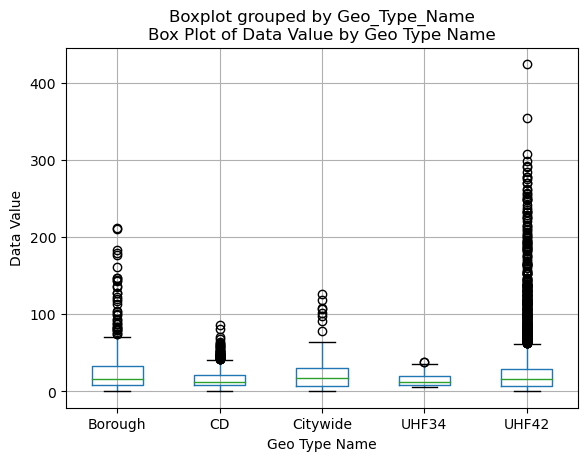

In [55]:
airp.boxplot(column='Data_Value', by='Geo_Type_Name')
plt.xlabel('Geo Type Name')
plt.ylabel('Data Value')
plt.title('Box Plot of Data Value by Geo Type Name')
plt.show()